Practical Work: Soft Matter
===========
<i><u>Authors</u></i>
> 1. Nitesh Khatiwada$^{*}$
> 2. Mirza Akbar Ali$^{\dagger}$

##### Abstract: The following project carries out the numerical simulations of ideal chain model of polymer. It verifies numerically the mean square end-to-end distance, $<Q^2>$, mean square radius of gyration $<R_g^2>$, probability distribution of end-to-end distance $P(Q)$, singluar behaviour $P(Q)$ for $N=2$, and structure factor, comparing with the theoretical results. Furthermore, it simulates the extension of the polymer in $\vec{x}$ direction by applying Force, $\vec{F}$ in the same direction, using Metropolis Monte-Carlo algorithm.
<br>

${*\dagger}$ QuanTEEM Group of Université de Bourgogne Franche-Comté, Dijon

###### Libraries, plotting parameters, and fixed constants

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy.spatial.distance import pdist
from sklearn.linear_model import LinearRegression

plt.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
        'axes.linewidth': 1,
        'lines.linewidth': 1,
        'figure.figsize': (4, 2.6)      # adjust this value to resize the figure (width, height)
    })
plt.rc('font', size=8)
plt.rc('axes', labelsize=7)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

b = 3                                 # bond vector length

In [ ]:
def write_xyz_data(N, T, b=3.0):
    ''' Writes xyz coordinates data into a file such that (x,y,z) are the points inside the sphere of radius b
    for each conformation T and total number of monomers N.
    
    Parameters
    ----------
    N: int
        The number of monomers in a polymer
    T: int
        The total number of conformations or frames
    b: float
        The bond lenght between each pair of monomers. The default value is 3.0
        
    Returns
    -------
        a. The output file with xyz data. The filename is set to 'simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
        b. The name of the output file into a string
    
    '''
    x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

    for t in range(T):

        bx, by, bz = np.random.uniform(-1,1,10*N), np.random.uniform(-1,1,10*N), np.random.uniform(-1,1,10*N)
        normb=np.sqrt(bx**2+by**2+bz**2)

        idb=np.where(normb<=1)[0][0:N]
        bx, by, bz =bx[idb]/normb[idb], by[idb]/normb[idb], bz[idb]/normb[idb]

        vb=b*np.array([bx,by,bz])   
        x[t,1:], y[t,1:], z[t,1:] = np.cumsum(vb[0]), np.cumsum(vb[1]), np.cumsum(vb[2])
                                       
    filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
    with open(filename,'w') as f:
        for t in range(T):
            f.write('%d\n'%(N+1))
            f.write('t=%d\n'%t)
            for n in range(N+1):
                f.write('C %8.3f %8.3f %8.3f\n'%(x[t,n],y[t,n],z[t,n]))
    return filename

def read_xyz_data(filename, N, T):
    ''' Reads xyz file format data and returns a T * N dimensional array
    
    Parameters
    ----------
    filename: str
        The name of the file with extension .xyz
    N: int
        The number of monomers in a polymer
    T: int
        The total number of conformations or frames
        
    Returns
    -------
        T * N * 3 dimensional array
    '''
    data = []
    with open(filename,'r') as f:
        for t in range(T):
            f.readline()
            f.readline()
            for n in range(N+1):
                data.append(list(map(float, f.readline().strip().split()[1:])))
    data = np.reshape(data, (T, N+1, 3))
    return data

def end_to_end_distance(data):
    ''' Calculates end-to-end distance Q and <Q^2> of polymer for each conformation
    
    Parameters
    ----------
    data: T * N * 3 dimensional array
    
    Returns
    -------
        a. End-to-End distance array of size T 
        b. The average of the squared of the end to end distance, <Q^2>
    '''
    q = [np.linalg.norm(data[i][-1] - data[i][0]) for i in range(len(data))]
    q_sq_mean = np.mean(np.array(q)**2)
    return q, q_sq_mean

def radius_of_gyration(data):
    ''' Calculates the radius of gyration Rg and <Rg^2> of polymer for each conformation
    
    Parameters
    ----------
    data: T * N * 3 dimensional array
    
    Returns
    -------
        a. Radius of gyration array of size T
        b. The average of the squared of radius of gyration, <Rg^2>
    '''
    Rcm = [[np.mean(data[i][:,0]), np.mean(data[i][:,1]), np.mean(data[i][:,2])] for i in range(len(data))] # center of mass
    rg = [np.sqrt(np.mean((data[i][:,0] - Rcm[i][0])**2 + (data[i][:,1] - Rcm[i][1])**2 + (data[i][:,2] - Rcm[i][2])**2)) for i in range(len(data))]
    rg_sq_mean =  np.mean(np.array(rg)**2)
    return rg, rg_sq_mean

##### GOAL 1

In [ ]:
N_values = [10, 20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
T = 10000
b = 3

Q_sq_mean_simulation, Rg_sq_mean_simulation = [], []
for N in N_values:
    file = write_xyz_data(N, T, b)
    data = read_xyz_data(file, N, T)
    
    Q, Q_sq_mean = end_to_end_distance(data)
    Q_sq_mean_simulation.append(Q_sq_mean)
      
    Rg, Rg_sq_mean = radius_of_gyration(data)
    Rg_sq_mean_simulation.append(Rg_sq_mean)

N_values_all = np.arange(1, 1000)
Q_sq_mean_theoretical = [N * b**2 for N in N_values_all]
Rg_sq_mean_theoretical = [N * b**2 * 1/6 for N in N_values_all]

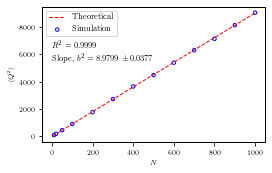

In [ ]:
plt.scatter(N_values, Q_sq_mean_simulation, s=12, facecolors='none', edgecolors='blue', label='Simulation')
plt.plot(N_values_all, Q_sq_mean_theoretical, '--', label='Theoretical', color='red')
X = np.array(N_values).reshape(-1,1)
Y = np.array(Q_sq_mean_simulation).reshape(-1,1)
reg = LinearRegression().fit(X, Y)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
slope_uncertainty = abs(coef[0,0]) * np.sqrt(1/(len(N_values) - 2) * (1-reg_value**2)/(reg_value**2))
plt.text(0, 6500, '$R^2 = {:10.4f}$'.format(reg_value))
plt.text(0, 5500, 'Slope, $b^2 = {:10.4f} \pm {:10.4f}$'.format(coef[0,0], slope_uncertainty))
plt.xlabel('$N$')
plt.ylabel(r'$\langle Q^2 \rangle $')
plt.legend(fontsize=8)
# plt.show()
plt.savefig('QMeanSq.pgf')

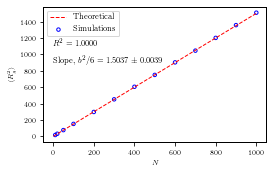

In [ ]:
plt.scatter(N_values, Rg_sq_mean_simulation, s=12, facecolors='none', edgecolors='blue', label='Simulations')
plt.plot(N_values_all, Rg_sq_mean_theoretical, '--', label='Theoretical', color='red')
X = np.array(N_values).reshape(-1,1)
Y = np.array(Rg_sq_mean_simulation).reshape(-1,1)
reg = LinearRegression().fit(X, Y)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
slope_uncertainty = abs(coef[0,0]) * np.sqrt(1/(len(N_values) - 2) * (1-reg_value**2)/(reg_value**2))
plt.text(0, 1100, '$R^2 = {:10.4f}$'.format(reg_value))
plt.text(0, 900, 'Slope, $b^2/6 = {:10.4f} \pm {:10.4f}$'.format(coef[0,0], slope_uncertainty))
plt.xlabel('$N$')
plt.ylabel(r'$ \langle R_g^2 \rangle$')
plt.legend()
# plt.show()
plt.savefig('RgMeanSq.pgf')
# comment Imp: There was latex rendering problem with the y axis label.

##### GOAL 2

In [ ]:
N = 100
T = 100000
file = write_xyz_data(N, T)
data = read_xyz_data(file, N, T)
q, q_sq_mean = end_to_end_distance(data)

1.2244549102948998


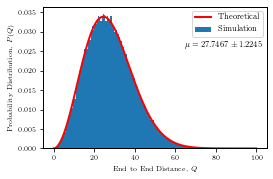

In [ ]:
# Histogram Plot for Probability distribution, P(Q)
qTh = np.arange(0, N, 0.01)
theP = 4 * math.pi * np.array(qTh)**2 *  (3/(2 * math.pi * N * b**2))**(3/2) * np.exp(-((3 * np.array(qTh)**2))/(2 * N * b**2))

n, bins, patches = plt.hist(q, bins=150, range=(min(q), max(q)), density=True, label='Simulation')
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
error = 2 * (bins[1] - bins[0])
print(error)
dev = np.sqrt(np.average((mids - mean)**2, weights=n))
plt.plot(qTh, theP, '-', linewidth=2, label='Theoretical', color='red')
plt.text(65, 0.026, '$\mu = {:10.4f} \pm {:10.4f}$'.format(mean, error))
# plt.text(80, 0.023, '$\sigma = {:10.4f}$'.format(dev, error))
plt.xlabel('End to End Distance, $Q$')
plt.ylabel('Probability Distribution, $P(Q)$')
plt.legend()
# plt.show()
plt.savefig('Histo.pgf')

In [ ]:
# Singular behaviour
N = 2
T = 10000
file = write_xyz_data(N, T)
data = read_xyz_data(file, N, T)
q, q_sq_mean = end_to_end_distance(data)

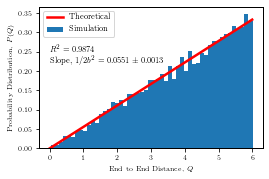

In [ ]:
qTh = np.arange(0, 2*b, 0.01)
theP = qTh/(2*b**2)

bins_value = 50
n, bins, patches = plt.hist(q, bins=bins_value, range=(min(q), max(q)), density=True, label='Simulation')

x_axis = np.linspace(min(q), max(q), bins_value)
X = np.array(x_axis).reshape(-1,1)
Y = np.array(n).reshape(-1,1)
reg = LinearRegression().fit(X, Y)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
slope_uncertainty = abs(coef[0,0]) * np.sqrt(1/(len(x_axis) - 2) * (1-reg_value**2)/(reg_value**2))
plt.text(0, 0.25, '$R^2 = {:10.4f}$'.format(reg_value))
plt.text(0, 0.22, 'Slope, $1/2b^2 = {:10.4f} \pm {:10.4f}$'.format(coef[0,0], slope_uncertainty))

plt.plot(qTh, theP, '-', linewidth=2.5, label='Theoretical', color='red')
plt.xlabel('End to End Distance, $Q$')
plt.ylabel('Probability Distribution, $P(Q)$')
plt.legend()
# plt.show()
plt.savefig('singular.pgf')

##### GOAL 3

In [ ]:
k_values = np.linspace(0, 0.2, 25)

In [ ]:
# Calculation of structure factor
N = 100
T = 10000
file = write_xyz_data(N, T)
data = read_xyz_data(file, N, T)

In [ ]:
I_values = []
for k in k_values[1:]:                         # for k=0, value gets undefined
    temp = []
    for n in range(T):
        dist = pdist(data[n])
        temp.append(np.mean(np.sin(k * dist)/(k * dist)))
    I_values.append(np.mean(temp))
I_values = [1] + I_values                     # for k = 0, it should be 1

In [ ]:
xaxis = k_values[:5] ** 2
X = np.array(xaxis).reshape(-1,1)
Y = np.array(I_values[:5]).reshape(-1,1)
reg = LinearRegression().fit(X, Y)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
slope_uncertainty = abs(coef[0,0]) * np.sqrt(1/(len(xaxis) - 2) * (1-reg_value**2)/(reg_value**2))
print(reg_value)
print(coef[0,0], slope_uncertainty)

0.9998722455307119
-49.087691505239704 0.4530609648617422


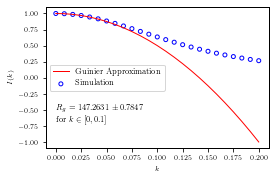

In [ ]:
# Theoretical value of Structure factor given by Guinier approximation
RgTh, Gui = N * (b**2)/6, []
for k in k_values:
    Gui.append((1 - ((k * np.sqrt(RgTh))**2)/3))
plt.scatter(k_values, I_values, s=16, facecolors='none', edgecolors='blue', label='Simulation')
plt.plot(k_values, Gui, 'r', label='Guinier Approximation')
plt.text(0, -0.5, '$R_g = {:10.4f} \pm {:10.4f}$'.format(-3 * coef[0,0], np.sqrt(3) * slope_uncertainty))
plt.text(0, -0.7, 'for $k \in [0, 0.1]$')
plt.xlabel('$k$')
plt.ylabel('$I(k)$')
plt.legend(loc=6)
# plt.show()
plt.savefig('structure.pgf')
# make font size 6,6,6 to fit correctly in the pdf.

##### FURTHER GOAL

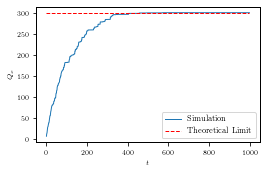

In [ ]:
def first_structure(F, N, b=3):
  ''' Creates a first structure t = 0 before starting the extension
  
  Parameters:
  ----------
  F: float
    Force applied along x-direction
  N: int
    The total number of monomers.
  b: float
    The bond lenght vector, default is 3.

  Returns:
  -------
    a. The bond vector data, a N * 3 dimensional matrix
    b. The end to end distance for the structure, [Qx, Qy, Qz].
    c. The initial energy value
  '''
  bx, by , bz = np.random.uniform(-1,1,10*N), np.random.uniform(-1,1,10*N), np.random.uniform(-1,1,10*N)
  normb=np.sqrt(bx**2+by**2+bz**2)

  idb=np.where(normb<=1)[0][0:N]
  bx, by , bz =bx[idb]/normb[idb], by[idb]/normb[idb], bz[idb]/normb[idb]

  vb=b*np.array([bx,by,bz])
  vb_save = np.copy(vb)
  x, y, z = np.cumsum(vb[0])[-1], np.cumsum(vb[1])[-1], np.cumsum(vb[2])[-1]
  Q = np.array([x, y, z])
  Fx = np.array([F, 0, 0])           # Force along x-direction
  Q = np.array([x, y, z])            # The end of the conformation
  V = -np.dot(Fx, Q)                  # Calculation of the potential
  return vb, Q, V


def polymer_extension(F, vb, Q, V, b=3):
  ''' Considering a force F along x-direction, the polymer is simulated to extend its end to end distance using 
      Metropolis Monte-Carlo Algorithm.

  Parameters
  ----------
  F: float
    Force applied along x-direction
  vb: array
    The bond vector data for N monomers.
  Q: array
    The 3 dimensional array for end-to-end distance.
  b: float
    The bond lenght vector, default is 3.

  Returns
  -------
    End-to-End distance distance for each conformation
  '''
  F = np.array([F, 0, 0])
  Q_data = []                 
  max_count = 1000
  counts = 0
  while counts < max_count:
      Qcopy = Q
      vbCopy = vb
      trialIn = np.random.randint(0, N)
      tension = np.abs(np.dot(F, vbCopy[:,trialIn]))
      vec = vbCopy[:,trialIn] + [tension, 0, 0]
      norm = np.linalg.norm(vec)
      vbCopy[:,trialIn] = b/norm * np.array(vec)
      # vbRand = np.random.uniform(size=(3))
      # vbRand = 2*b*1/np.linalg.norm(vbRand)*vbRand
      # vbCopy[:,trialIn] = vbRand     # a random bond vector is changed with random values  
      vbTrial = vbCopy
      x, y , z = np.cumsum(vbTrial[0])[-1], np.cumsum(vbTrial[1])[-1], np.cumsum(vbTrial[2])[-1]
      Qtrial = np.array([x, y, z])   # the end of the conformation is taken
      Etrial = -np.dot(F, Qtrial)    # potential energy
      deltaE = Etrial - V
      if deltaE < 0:
          # accept condition; save Q data
          Q = Qtrial
          vb = vbTrial
          Q_data.append(Qtrial)
      else:
          xi = np.random.rand(1)
          exp = np.exp(-deltaE)
          if xi < exp:
              # accept condition; save Q data
              vb = vbTrial
              Q = Qtrial
              Q_data.append(Qtrial)
          else:
              # reject condition; carry over the same data
              Q_data.append(Qcopy)
      V = Etrial
      counts += 1
  Q_data = np.array(Q_data)    
  return Q_data

F = 10
N = 100
vb, Q, V = first_structure(F, N)
Q_data = polymer_extension(F, vb, Q, V)
alpha = ([F, 0, 0] * b)[0]
kbT_param = 0.17
Q_data = np.array(Q_data)
xaxis = np.arange(0, len(Q_data))
plt.plot(xaxis, Q_data[:,0], label='Simulation')
alpha_lim, kbT_param = F * b, 0.17
theo = N * b * (1/np.tanh(alpha_lim/kbT_param) - kbT_param/alpha_lim)
plt.plot(xaxis, theo * np.ones(len(Q_data)), '--', label='Theoretical Limit', color='red')
plt.xlabel('$t$')
plt.ylabel('$Q_x$')
plt.legend()
# plt.show()
plt.savefig('Xextension.pgf')
print(np.amax(Q_data[:,0]))

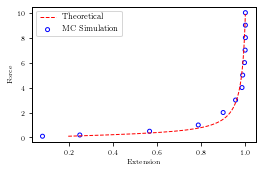

In [ ]:
N = 500
max_F = 10
F_values = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, max_F]
F_theo_values = np.arange(0.1, 10, 0.1)
alpha_lim = ([max_F, 0, 0] * b)[0]
kbT_param = 0.17
theo_limit = N * b * (1/np.tanh(alpha_lim/kbT_param) - kbT_param/alpha_lim)
extension_sim, extension_theoretical = [], []

vb, Q, V = first_structure(max_F, N)
for F in F_values:
  Q_data = polymer_extension(F, vb, Q, V)
  extension = Q_data[:,0][-1]
  extension_sim.append(extension) 
extension_sim = np.array(extension_sim) * 1/extension_sim[-1]
for F in F_theo_values:
  alpha = ([F, 0, 0] * b)[0]
  theo = N * b * (1/np.tanh(alpha/kbT_param) - kbT_param/alpha)
  extension_theoretical.append(theo/theo_limit)

plt.scatter(extension_sim, F_values, s=16, facecolors='none', edgecolors='blue', label='MC Simulation')
plt.plot(extension_theoretical, F_theo_values, '--', label='Theoretical', color='red')
plt.xlabel('Extension')
plt.ylabel('Force')
plt.legend()
# plt.show()
plt.savefig('force.pgf')

In [ ]:
# Only run this part of code if you wish to see the simulation of extension of the polymer

'''
import imageio
def create_frame_xz(t):
    fig = plt.figure(figsize=(16, 5))  
    plt.plot(Q_data[:,0][:(t+1)], Q_data[:,2][:(t+1)], linewidth=3, color='grey')  
    plt.scatter(Q_data[:,0][t], Q_data[:,2][t], s=50) 
    plt.xlim(0, max(Q_data[:,0]))
    plt.ylim(0, max(Q_data[:,2]))
    plt.xlabel('$Q_x$')
    plt.ylabel('$Q_z$')
    plt.savefig(f'./img/img_z{t}.png')    
    plt.close()
def create_frame_xy(t):
    fig = plt.figure(figsize=(16, 5))  
    plt.plot(Q_data[:,0][:(t+1)], Q_data[:,1][:(t+1)], linewidth=3, color='grey')  
    plt.scatter(Q_data[:,0][t], Q_data[:,1][t], s=50) 
    plt.xlim(0, max(Q_data[:,0]))
    plt.ylim(0, max(Q_data[:,1]))
    plt.xlabel('$Q_x$')
    plt.ylabel('$Q_y$')
    plt.savefig(f'./img/img_y{t}.png')    
    plt.close()

for t in range(len(xaxis)):
    create_frame_xz(t)
    create_frame_xy(t)

frames = []
for t in xaxis:
    imagey = imageio.imread(f'./img/img_y{t}.png')
    imagez = imageio.imread(f'./img/img_z{t}.png')
    framesy.append(imagey)
    framesz.append(imagez)
imageio.mimsave('./xy.gif',framesy,fps = 5)
imageio.mimsave('./xz.gif',framesz,fps = 5)
'''